<hr>

# Program plots profiles of state variables and process tendencies at various locations and times of ENSO phase

<ul>
<li> Level 1: Mean profiles of states and tendencies during ENSO phase (seasons: monthly means) </li>
<li> Level 2: Time varying profiles during a season or seasonal transtion </li>
<li> Level 3: Statistical reltiosnhips between vertical processes and ENSO/forcing/dynamical strength </li>
</ul>
<hr>

In [40]:
import numpy as np
import matplotlib.pyplot as mp
import xarray as xr
import datetime as dt
import cartopy.crs as ccrs
import pandas as pd
import metpy as mpy
import dask as ds

In [41]:
### To Import My Functions ###
import vert_proc_func as mypy
import importlib

# Initial Simulation Information

In [44]:

#case_desc = np.array(['C6','C5','rC5now','rUW','rUWp','rMG1','rC5p','rC5pm','rZMc','rZMp','rpfrac','rCE2i']) ; pref_out = 'revert'
case_desc = np.array(['C6','rC5','rCE2i','rUW','rMG1','rC5p','rZMc','rZMp','rpfrac','rTMS','rGW']) ; pref_out = 'revert'                      
#case_desc = np.array(['C6','rC5','rCE2i']) ; pref_out = 'test'     

#month_ave = np.array(["Jul","Aug","Sep","Oct","Nov"]) 
month_ave = np.array(["Jan","Feb","Dec"])

clim_anal = False

years_hist = [1979,1990] # Year range of history files to read.

dir_croot = '/glade/p/cgd/amp/people/hannay/amwg/climo/' # Directories with climo files
dir_hroot = '/glade/p/cgd/amp/amwg/runs/' # Run firectories with history files

dir_proot = '/glade/u/home/rneale/python/python-figs/vert_proc/'
dir_obs = '/glade/p/cesm/amwg/amwg_data/obs_data/'







## Variable description ##

var_name = 'OMEGA'

## Variables ##

var_desc = {}

var_desc['DTCOND'] = ['dT/dt Total',86400.,1., -5.,5.,'K/day']
var_desc['DCQ']    = ['dq/dt Total',86400*1000.,1., -4.,4.,'g/kg/day']
var_desc['ZMDT']   = ['dT/dt Convection',86400., 1.,-5.,5.,'K/day']
var_desc['ZMDQ']   = ['dq/dt Convection',86400.*1000., 1.,-4.,4.,'g/kg/day']
var_desc['STEND_CLUBB'] = ['dT/dt turbulence',86400./1004., 1. ,-2.,8.,'K/day']
var_desc['OMEGA'] = ['OMEGA',-1., -100./86400., -0.06,0.06,'pa/s']
var_desc['DIV'] = ['Divergence',1., 100./86400., -0.0005,0.0005,'/s']



# Include obseravtions? #
lobs = True

ppmin = 50. ; ppmax = 1000.

p_levs = np.arange(ppmin,ppmax,50.)



###### NAMES CATALOGUE ######
sim_names = cam_revert_list()
#sim_names = cam_vres_list()


### Named Regions ###

reg_names = {}

#reg_names['E Pac'] = ['East Pacific',7.5,10,220.,240] # ITCZ East Pacific
#reg_names['C Pac'] = ['Central Pacific',-5,5,180.,220] # Upwelling C. Pacific Pacific
#reg_names['W Pac'] = ['West Pacific',-10,10,120.,160] # Equatorial Warm Pool W. Pacific

reg_names['Nino Wet'] = ['C. Pacific Nino Wet',-10,0.,160.,210]  # Core of nino precip signal
reg_names['WP Dry']   = ['West Pac. Nino Dry.',-5,10.,120.,150]  # Core of W. Pacific signal
reg_names['Conv U']   = ['Convergence Min',25,50.,160,190]       # Core of RWS convergence min.




## Specify data frames ##

reg_df = pd.DataFrame.from_dict(reg_names, orient='index',columns=['long_name','lat_s','lat_n','lon_w','lon_e'])
var_df = pd.DataFrame.from_dict(var_desc, orient='index',columns=['long_name','vscale','ovscale','xmin','xmax','vunits'])

print(reg_df)
print()
print(var_df)

                    long_name  lat_s  lat_n  lon_w  lon_e
Nino Wet  C. Pacific Nino Wet    -10    0.0  160.0    210
WP Dry    West Pac. Nino Dry.     -5   10.0  120.0    150
Conv U        Convergence Min     25   50.0  160.0    190

                    long_name        vscale   ovscale    xmin    xmax  \
DTCOND            dT/dt Total  8.640000e+04  1.000000 -5.0000  5.0000   
DCQ               dq/dt Total  8.640000e+07  1.000000 -4.0000  4.0000   
ZMDT         dT/dt Convection  8.640000e+04  1.000000 -5.0000  5.0000   
ZMDQ         dq/dt Convection  8.640000e+07  1.000000 -4.0000  4.0000   
STEND_CLUBB  dT/dt turbulence  8.605578e+01  1.000000 -2.0000  8.0000   
OMEGA                   OMEGA -1.000000e+00 -0.001157 -0.0600  0.0600   
DIV                Divergence  1.000000e+00  0.001157 -0.0005  0.0005   

               vunits  
DTCOND          K/day  
DCQ          g/kg/day  
ZMDT            K/day  
ZMDQ         g/kg/day  
STEND_CLUBB     K/day  
OMEGA            pa/s  
DIV           

# Main Code
## Monthly Climatologies

-Averaging for months -  ['Jan' 'Feb' 'Dec']



**** CASE #  [1]  OF  11  ****
- Name =  C6  -> f.e20.FHIST.f09_f09.cesm2_1.001
  - Region =  C. Pacific Nino Wet  -  -10 0.0 160.0 210
-Averaging for region -  160-210°E -10.0-0°N
  - Region =  West Pac. Nino Dry.  -  -5 10.0 120.0 150
-Averaging for region -  120-150°E -5.0-10°N
  - Region =  Convergence Min  -  25 50.0 160.0 190
-Averaging for region -  160-190°E 25.0-50°N


**** CASE #  [2]  OF  11  ****
- Name =  rC5  -> f.e20.FHIST.f09_f09.cesm2_1_true-cam5.001
  - Region =  C. Pacific Nino Wet  -  -10 0.0 160.0 210
-Averaging for region -  160-210°E -10.0-0°N
  - Region =  West Pac. Nino Dry.  -  -5 10.0 120.0 150
-Averaging for region -  120-150°E -5.0-10°N
  - Region =  Convergence Min  -  25 50.0 160.0 190
-Averaging for region -  160-190°E 25.0-50°N


**** CASE #  [3]  OF  11  ****
- Name =  rCE2i  -> f.e20.FHIST.f09_f09.cesm2_1_revert125.001
  - Region =  C. Pacific Nino Wet  -  -10 0.0 160.0 210
-Averaging for region -  160-2

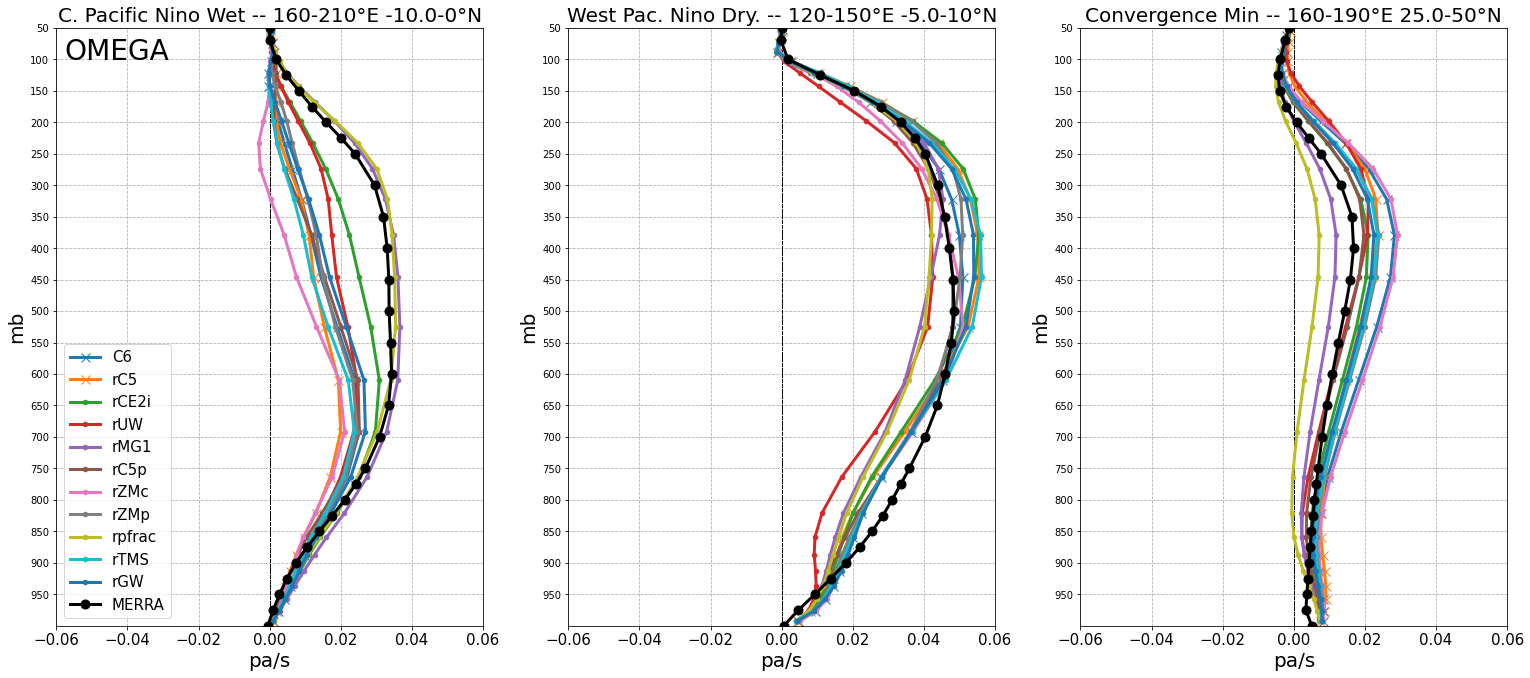

In [45]:
# Plan #

# - Seasonal Means - 
# - Cases -
# - Variables -
# 1. - Tendency Fields -
# 1. - Global fields -
# 1. - Global, vertical intergrals -
# 2. - Global PDFs (p levels)
# 3. - ENSO differences
# 3. - Dynamic Criteria (W500,PRECT)



nmnths = month_ave.size
ncases = case_desc.size
nregions = reg_df.index.size

xmin = var_df.loc[var_name]['xmin'] ; xmax=var_df.loc[var_name]['xmax']
vunits = var_df.loc[var_name]['vunits'] 
var_text = var_df.loc[var_name]['long_name']   


## LOOP ##
fig, ax = mp.subplots(1,nregions,figsize=(26, 11))



print('-Averaging for months - ',month_ave)
print('')

#### Month numbering/concatonation ###
mnums = []

# Construct month strings
for im in range(0,nmnths): mnums.append(dt.datetime.strptime(month_ave[im], "%b").month)
mon_aves = [ "{:02}".format(x) for x in mnums ] # In correct format
mon_list = ','.join(mon_aves)




# Observations ?? #
if lobs: 
    obs_name = 'ERAI'
    ofiles_in = [dir_obs+obs_name+'_'+mon_aves[ff]+'_climo.nc' for ff in range(nmnths)]
    ofiles_ptr = xr.open_mfdataset(ofiles_in,parallel=True)
   
    if var_name == 'DIV':         
        ovar_in = -ofiles_ptr['OMEGA'].mean(dim=['time']).differentiate("lev")  
    else :
        ovar_in = ofiles_ptr[var_name].mean(dim=['time'])
    
    
    levs_o = ofiles_ptr['lev']
    ilevs_o = np.where(levs_o >= min(p_levs))
    ilevs_o = ilevs_o[0]



    
    
    
########################
##### LOOP CASES  ######
########################

for icase,case in enumerate(case_desc): # Do first so don't have to do a read mutliple times
    
# Grab run name 
    
    sim_name = sim_names.loc[case]['run name']
    
    print('')
    print('')
    print('**** CASE # ',[icase+1],' OF ',ncases,' ****')
    print('- Name = ',case,' ->',sim_name)
                    
## Read data in from files ##

# Changes pref. depending on case
    pre_dir = 'yrs_1979-2005' if case=='CE2' else '0.9x1.25'  

# Detemine files for input
    cfiles_in = [dir_croot+sim_name+'/'+pre_dir+'/'+sim_name+'_'+mon_aves[ff]+'_climo.nc' for ff in range(nmnths)]
    
# Point to files
    cfiles_ptr = xr.open_mfdataset(cfiles_in)
       
# Region independent fields 
    hyam = cfiles_ptr['hyam'] ; hybm = cfiles_ptr['hybm'] ; P0 = cfiles_ptr['P0'] ; lev = cfiles_ptr['lev']
    ilevs = np.where(lev >= min(p_levs))
    ilevs = ilevs[0]
    dp_lev = np.diff(lev)
    

    
    
    
    
    # Variable read in and time averaging (with special cases).

    if var_name == 'DTCOND' and case in ['rC5','rUW']: 
            var_in = cfiles_ptr['DTCOND'].mean(dim=['time'])+cfiles_ptr['DTV'].mean(dim=['time'])

    if var_name == 'DCQ' and case in ['rC5','rUW']: 
            var_in = cfiles_ptr['DCQ'].mean(dim=['time'])+cfiles_ptr['VD01'].mean(dim=['time'])
    
    if var_name == 'STEND_CLUBB':
       
        if case in ['rC5','rUW'] : 
       
            var_in = 1005.*(cfiles_ptr['DTV'].mean(dim=['time'])
            +cfiles_ptr['MACPDT'].mean(dim=['time'])/1000.
            +cfiles_ptr['CMFDT'].mean(dim=['time']))
        else :
            var_in = cfiles_ptr[var_name].mean(dim=['time'])           
    
    if var_name == 'DIV':  
            var_in = -cfiles_ptr['OMEGA'].mean(dim=['time']).differentiate("lev")
   
    if var_name in ['OMEGA','ZMDT','ZMDQ']:
            var_in = cfiles_ptr[var_name].mean(dim=['time'])

            
            
            
########################    
### Now Loop Regions ###
########################
    
    for ireg,reg in enumerate(reg_df.index):  ## 4 regions let's assume ##

### Assign lat/lon region domain ###

        reg_name = reg_df.loc[reg]['long_name'] 
    
        reg_s = reg_df.loc[reg]['lat_s'] ; reg_n = reg_df.loc[reg]['lat_n']
        reg_w = reg_df.loc[reg]['lon_w'] ; reg_e = reg_df.loc[reg]['lon_e']
        
        print('  - Region = ',reg_name,' - ',reg_s,reg_n,reg_w,reg_e)
                   
        reg_a_str = '%d-%d\u00b0E %.1f-%d\u00b0N' % (reg_w,reg_e,reg_s,reg_n)
        reg_a_out = '%d-%dE_%.1f-%dN' % (reg_w,reg_e,reg_s,reg_n)  
         
        print('-Averaging for region - ',reg_a_str)

        
### Scale, trim and average ###

        var_plot = var_df.loc[var_name]['vscale']*var_in.loc[:,reg_s:reg_n,reg_w:reg_e]
        var_plot = var_plot.mean(dim=['lat','lon'])        
        
        pmark = 'x' if case_desc[icase] in ['C6','rC5'] else '.'
        ax[ireg].plot(var_plot[ilevs],lev[ilevs],lw=3,markersize=9,marker=pmark)  
 
        ax[ireg].set_title(reg_name+' -- '+reg_a_str,fontsize=20)
        ax[ireg].set_xlim([xmin,xmax])
        ax[ireg].set_ylim([ppmax,ppmin])
        ax[ireg].set_ylabel('mb',fontsize=20) 
        ax[ireg].set_xlabel(vunits,fontsize=20)      
        ax[ireg].set_yticks(p_levs)

        ax[ireg].grid(linestyle='--')  
        ax[ireg].vlines(0., ppmax, ppmin, linestyle="dashed",lw=1, color='black')


      
        if icase==ncases-1 and lobs: # Add obs. at end of last case
            ovar_plot = var_df.loc[var_name]['ovscale']*ovar_in.loc[:,reg_s:reg_n,reg_w:reg_e]
            ovar_plot = ovar_plot.mean(dim=['lat','lon']) 

#            if var_name == 'DIV':  
#                ovar_plot = ovar_plot.differentiate("lev")
            ax[ireg].plot(ovar_plot[ilevs_o],levs_o[ilevs_o],lw=3,markersize=9,marker='o',color = 'black')   

    
leg_cases = np.append(case_desc,'MERRA') if lobs else case_desc

lloc = 'lower right' if var_name in ['ZMDQ','STEND_CLUBB'] else 'lower left'
ax[0].legend(leg_cases,fontsize=15,loc = lloc)
ax[0].text(xmin+0.02*(xmax-xmin), ppmin+50,var_text, ha='left',fontsize=28)

mp.rcParams['xtick.labelsize'] = 15 # GLobal set of xtick label size    




# Hard copy    
mp.savefig(dir_proot+pref_out+'_vprof_'+var_name+'_'+reg_a_out+'_'+month_ave[0]+'_to_'+month_ave[nmnths-1]+'.png', dpi=150)
#mp.show()

# ENSO Phase Compositing of Tendencies 
- Read in hist timeseries
- Calculate SST nino timeseries
- Composites based on season for vertical profiles
- Composites vertical profiles minus climo.



**** CASE #  [1]  OF  3  ****
- Name =  C6  -> f.e20.FHIST.f09_f09.cesm2_1.001

case =  C6
/glade/p/cgd/amp/amwg/runs/f.e20.FHIST.f09_f09.cesm2_1.001/atm/hist/f.e20.FHIST.f09_f09.cesm2_1.001.cam.h0.1979-01.nc
/glade/p/cgd/amp/amwg/runs/f.e20.FHIST.f09_f09.cesm2_1.001/atm/hist/f.e20.FHIST.f09_f09.cesm2_1.001.cam.h0.1990-12.nc
CPU times: user 54.1 s, sys: 6.8 s, total: 1min
Wall time: 1min 13s
<xarray.DataArray 'strftime' (time: 144)>
array(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
 

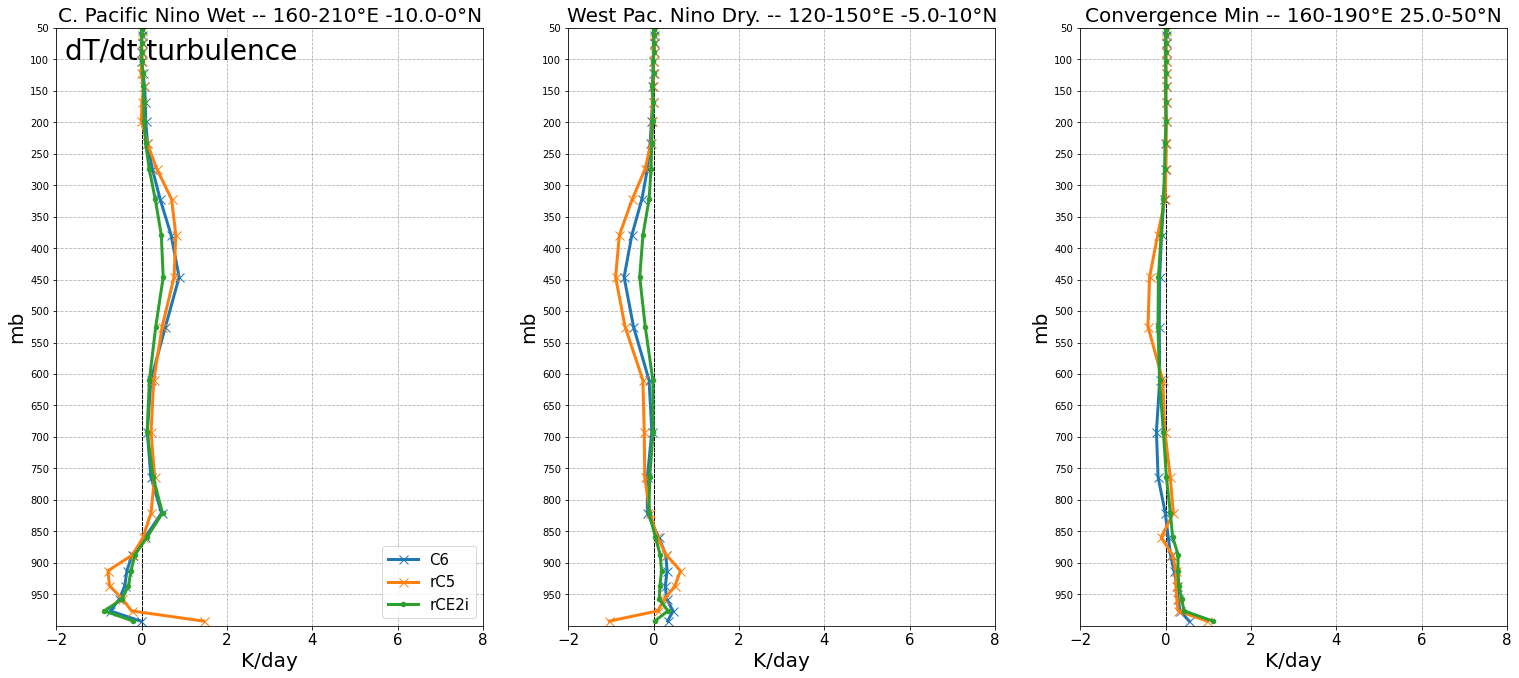

In [37]:
importlib.reload(mypy) # Required because I am constantly editing scam_func.py

### Read in history monthly mean files and composite profiles for tendencies###
dir_hroot = '/glade/p/cgd/amp/amwg/runs/'

#### Read in Data ####

yr0 = years_hist[0]
yr1 = years_hist[1]


## LOOP ##
fign, axn = mp.subplots(1,nregions,figsize=(26, 11))

########################
##### LOOP CASES  ######
########################

for icase,case in enumerate(case_desc): # Do first so don't have to do a read mutliple times

# Grab run name 
    
    sim_name = sim_names.loc[case]['run name']
    
    print('')
    print('')
    print('**** CASE # ',[icase+1],' OF ',ncases,' ****')
    print('- Name = ',case,' ->',sim_name)
                    
## Read data in from files ##

# Construct required history file month-year array

    hist_myr = np.array([".cam.h0.%d-%02d.nc"%(y, m) for y in range(yr0,yr1+1) for m in range(1,12+1)])
    num_h0 = hist_myr.size
  
    print('')
    print('case = ',case)
    
# Determine files for input
    hfiles_in = [dir_hroot+sim_name+'/atm/hist/'+sim_name+hist_myr[ff] for ff in range(num_h0)]
    print(hfiles_in[0])
    print(hfiles_in[-1])
    
# Point to files 
    # Point to files
    %time hfiles_ptr = xr.open_mfdataset(hfiles_in,parallel=True)
    
# Have to modify based on month 1 is jan and not feb
#    hfiles_ptr.time.dt.month[0]=1


#    hmonths = hfiles_ptr.time.dt.month      
    hmonths = hfiles_ptr.time.dt.strftime("%b") 
#    nino_stats = mypy.nino_sst_anom(hfiles_ptr,'nino3')
    
    
# Variable to plot.

# Seasons

    djf = ['Jan','Feb','Mar']

#    lmon_seas = np.where(hmonths in ['Jan','Feb','Mar']
    print(hmonths)
    lmon_seas = np.isin(hmonths,djf)
    imon_seas = np.argwhere(lmon_seas)
    print(imon_seas)

# SST anoms and months

#    lnino_sst = nino_stats > np.std(nino_stats)
#    lnina_sst = nino_stats < np.std(nino_stats)
                                  
#    print(lnino_sst)
#    lnino_months = np.logical_and(lmon_seas,lnino_sst)
    
#    print(lnino_months)
#    inino_djf = np.argwhere(lnino_months)
#    print(inino_djf)
    
#    print(np.nonzero(inino_djf))
#    print(nino_stats[inino_djf])
 

# Now read in the fields and time average

    if var_name == 'DTCOND' and case in ['rC5','rUW']: 
            var_in = hfiles_ptr['DTCOND']+hfiles_ptr['DTV']
    if var_name == 'DCQ' and case in ['rC5','rUW']: 
            var_in = hfiles_ptr['DCQ']+hfiles_ptr['VD01']
    
    if var_name == 'STEND_CLUBB':
        print("hi")
        if case in ['rC5','rUW'] : 
            print("hi")
            var_in = 1005.*(hfiles_ptr['DTV']
            +hfiles_ptr['MACPDT']/1000.
            +hfiles_ptr['CMFDT']) 
        else :
            var_in = hfiles_ptr[var_name]           
    
    if var_name == 'DIV':  
            var_in = -hfiles_ptr['OMEGA'].differentiate("lev")
   
    if var_name in ['OMEGA','ZMDT','ZMDQ']:
            var_in = hfiles_ptr[var_name]
    
    
    print(var_in)


    imon_seas = [0,1,11,12,13,23,24,25,35]
    inino_djf = [11,12]
    
    imon_seas = [0,1,11,12,13,23,24,25,35,36,37,47,48,49,60,61,71,72,73,83,84,85,95,96,97,107,108,109,119,120,121,131,132,133,143]
    inino_djf = [47,48,49,96,97,107]

    var_in_anom = var_in[inino_djf,:,:,:].mean(dim=['time']) 
    var_in_seas = var_in[imon_seas,:,:,:].mean(dim=['time']) 

# Region independent fields 
    hyam = hfiles_ptr['hyam'] ; hybm = hfiles_ptr['hybm'] ; P0 = hfiles_ptr['P0'] ; lev = hfiles_ptr['lev']
    ilevs = np.where(lev >= min(p_levs))
    ilevs = ilevs[0]
    dp_lev = np.diff(lev)
    
    
########################    
### Now Loop Regions ###
########################
    
    for ireg,reg in enumerate(reg_df.index):  ## 4 regions let's assume ##

### Assign lat/lon region domain ###

        reg_name = reg_df.loc[reg]['long_name'] 
    
        reg_s = reg_df.loc[reg]['lat_s'] ; reg_n = reg_df.loc[reg]['lat_n']
        reg_w = reg_df.loc[reg]['lon_w'] ; reg_e = reg_df.loc[reg]['lon_e']
        
        print('  - Region = ',reg_name,' - ',reg_s,reg_n,reg_w,reg_e)
                   
        reg_a_str = '%d-%d\u00b0E %.1f-%d\u00b0N' % (reg_w,reg_e,reg_s,reg_n)
        reg_a_out = '%d-%dE_%.1f-%dN' % (reg_w,reg_e,reg_s,reg_n)  
         
        print('-Averaging for region - ',reg_a_str)

        
### Scale, trim and average ###

        var_plot = var_df.loc[var_name]['vscale']*(var_in_anom.loc[:,reg_s:reg_n,reg_w:reg_e]-var_in_seas.loc[:,reg_s:reg_n,reg_w:reg_e])
        print(var_plot)
        var_plot = var_plot.mean(dim=['lat','lon'])        
        
        pmark = 'x' if case_desc[icase] in ['C6','rC5'] else '.'
        axn[ireg].plot(var_plot[ilevs],lev[ilevs],lw=3,markersize=9,marker=pmark)  
 
        axn[ireg].set_title(reg_name+' -- '+reg_a_str,fontsize=20)
        axn[ireg].set_xlim([xmin,xmax])
        axn[ireg].set_ylim([ppmax,ppmin])
        axn[ireg].set_ylabel('mb',fontsize=20) 
        axn[ireg].set_xlabel(vunits,fontsize=20)      
        axn[ireg].set_yticks(p_levs)

        axn[ireg].grid(linestyle='--')  
        axn[ireg].vlines(0., ppmax, ppmin, linestyle="dashed",lw=1, color='black')


      
        if icase==ncases-1 and lobs: # Add obs. at end of last case
            ovar_plot = var_df.loc[var_name]['ovscale']*ovar_in.loc[:,reg_s:reg_n,reg_w:reg_e]
            ovar_plot = ovar_plot.mean(dim=['lat','lon']) 

#            if var_name == 'DIV':  
#                ovar_plot = ovar_plot.differentiate("lev")
            ax[ireg].plot(ovar_plot[ilevs_o],levs_o[ilevs_o],lw=3,markersize=9,marker='o',color = 'black')   

    
leg_cases = np.append(case_desc,'MERRA') if lobs else case_desc

lloc = 'lower right' if var_name in ['ZMDQ','STEND_CLUBB'] else 'lower left'
axn[0].legend(leg_cases,fontsize=15,loc = lloc)
axn[0].text(xmin+0.02*(xmax-xmin), ppmin+50,var_text, ha='left',fontsize=28)

mp.rcParams['xtick.labelsize'] = 15 # GLobal set of xtick label size    




# Hard copy    
mp.savefig(dir_proot+pref_out+'_nino_vprof_'+var_name+'_'+reg_a_out+'_'+month_ave[0]+'_to_'+month_ave[nmnths-1]+'.png', dpi=150)
#mp.show()   

In [38]:
## Plot nino anomaies









In [39]:
#####################################
# CAM6 Revert Experiments + others   
#####################################


def cam_revert_list():
	

    rl = {} # Revert List
# Releases
    rl['C4']   =  ['f40.1979_amip.track1.1deg.001']
    rl['C5']   =  ['30L_cam5301_FAMIP.001']
    rl['C6']   =  ['f.e20.FHIST.f09_f09.cesm2_1.001']
    rl['CC4']  =  ['b40.20th.track1.1deg.012']
    rl['CE1']  =  ['b.e11.B20TRC5CNBDRD.f09_g16.001']
    rl['CE2']  =  ['b.e21.BHIST.f09_g17.CMIP6-historical.001']

    # Reverts
    rl['rC5now']  =   ['f.e20.FHIST.f09_f09.cesm2_1_cam5.001']
    rl['rC5']     =   ['f.e20.FHIST.f09_f09.cesm2_1_true-cam5.001']
    rl['rC5t']    =   ['f.e20.FHIST.f09_f09.cesm2_1_true-cam5_param_topo.001']
    rl['rUWold']  =   ['f.e20.FHIST.f09_f09.cesm2_1_uw.001']
    rl['rGW']    =   ['f.e20.FHIST.f09_f09.cesm2_1_iogw.001']
    rl['rZMc']  =   ['f.e20.FHIST.f09_f09.cesm2_1_capeten.001']
    rl['rMG1']  =   ['f.e20.FHIST.f09_f09.cesm2_1_mg1.001']
    rl['rSB']  =   ['f.e20.FHIST.f09_f09.cesm2_1_sb.002']
    rl['rTMS']  =   ['f.e20.FHIST.f09_f09.cesm2_1_tms.001']
    rl['rCE2i']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revert125.001']
    rl['rC5p']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertcam5param.001']
    rl['rC5pm']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertcam5param.002']
    rl['rZMp']  =   ['f.e20.FHIST.f09_f09.cesm2_1_cam5_zmconv.001']
    rl['rM3']  =   ['f.e20.FHIST.f09_f09.cesm2_1_mam3.001']
    rl['rUW']  =   ['f.e20.FHIST.f09_f09.cesm2_1_uw.002']
    rl['rUWp']  =   ['f.e20.FHIST.f09_f09.cesm2_1_uw.003']
    rl['rMG1ii']  =   ['f.e20.FHIST.f09_f09.cesm2_1_mg1.002']
    rl['rice']  =   ['f.e20.FHIST.f09_f09.cesm2_1_ice-micro.001']
    rl['rpfrac']  =   ['f.e20.FHIST.f09_f09.cesm2_1_precip_frac_method.001']
    rl['rpremit']  =   ['f.e20.FHIST.f09_f09.cesm2_1_cld_premit.001']
    rl['rC5psalt']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertc5seasalt.001']
    rl['rC5pdust']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertc5dust.001']
    rl['rL30']  =   ['f.e20.FHIST.f09_f09.cesm2_1_L30.001']
    
# SST configs    
    rl['CE2sst']  =   ['f.e20.FHIST.f09_f09.cesm2_1_coupled-sst-amip.001']
    rl['CE2sstd']  =   ['f.e20.FHIST.f09_f09.cesm2_1_coupled-sst-amip_daily.001']
    rl['REYsstd']  =   ['f.e20.FHIST.f09_f09.cesm2_1_reynolds_daily_sst.006']

    
# High vertical resolution.
    rl['W110']  =   ['f.e21.FWscHIST_BCG.f09_f09_mg17_110L.001']
    rl['W121']  =   ['f.e21.FWscHIST_BCG.f09_f09_mg17_121L_DZ_400m_80kmTop.001']

# Data frame
    rl_df = pd.DataFrame.from_dict(rl, orient='index',columns=['run name'])
    return rl_df

In [34]:

def cam_vres_list():
	

    rl = {} # Revert List
# BL Vres
    rl['C5']   =  ['30L_cam5301_FAMIP.001']
    rl['C6']   =  ['f.e20.FHIST.f09_f09.cesm2_1.001']
    rl['L48']       =  ['f.e21.FWscHIST_BGC.ne30_ne30_mg17_L48_revert-J.001']
    rl['L48cin5']   =  ['f.e21.FWscHIST_BGC.ne30_ne30_mg17_L48_revert-J_num_cin-5.001']
    rl['L110'] = ['f.e21.FWscHIST_BCG.f09_f09_mg17_110L.001']


# Data frame
    rl_df = pd.DataFrame.from_dict(rl, orient='index',columns=['run name'])
    return rl_df